## Attention, Transformers, and GPT

By now, you've surely heard of ChatGPT (https://openai.com/blog/chatgpt). This model, developed by OpenAI, has changed the game not only in AI circles, but in the world at large. Within two months of its release, it crossed 100 million active users, making it the fastest-growing consumer application in history.

As of writing, the model itself is fine-tuned from the GPT-3.5 series, which is a series of language models trained on data from before Q4 2021 (https://platform.openai.com/docs/model-index-for-researchers). 

But, things move fast in the world of AI. Just weeks ago, OpenAI released GPT-4 (https://openai.com/research/gpt-4), which "exhibits human-level performance on various professional and academic benchmarks." Moreover, OpenAI says that: "GPT-4 is more reliable, creative, and able to handle much more nuanced instructions than GPT-3.5." In fact, by the time you read this, you'll probably be able to interact with GPT-4 via the ChatGPT interface (where you can test out their claims out for yourself). 

But what is it about these models that make them so powerful?

The answer to this is complicated, especially since OpenAI is no longer commited to being "open" (pun intended) about sharing their source code. That being said, we do know the basics; which includes things like the data, the underlying model architecture, and the training procedure.

In this blog post, we'll only focus on one of those things -- and arguably the most interesting. That is, we'll discuss the fundamental component of the GPT models: the Transformer architecture.

Lets start with the name itself: **GPT** stands for *Generative Pre-trained Transformer*. 

"Generative" here tells us that we are dealing with sequences. In the case of the GPT models, these sequences are usually in the domain of natural language. However, this approach can be applied to any type of sequential data.

"Pre-trained" implies the use of tranfer learning. If you're not familiar with transfer learning, it usually goes like this:

1. First, a gigantic, generalized language model is trained on a huge amount of data
2. Then, this model is fine-tuned (trained briefly) to perform some specific task.

Lastly, "Transformer" is referring to the Transformer architecture. This architecture was first introduced in a paper called _Attention Is All You Need_ (2017), which can be found here https://arxiv.org/pdf/1706.03762.pdf. This paper has become one of the most consequential (and cited) in the history of AI.

In this post, we'll take a closer look at the underlying architecture of the Transformer, and what makes it so powerful.

## The Attention Mechanism

At the heart of the Transformer architecture is the Attention mechanism, introduced in a paper called _Neural Machine Translation By Jointly Learning to Align and Translate_, by Bahdanau et al. https://arxiv.org/pdf/1409.0473.pdf). It is a sequence-to-sequence operation; meaning,  a sequence of vectors goes in, and a sequence of vectors comes out. So, although originally designed for machine translation, it can be applied to any task involving sequential data.

There are many variations of Attention, but we'll be focusing on the flavor defined in _Attention Is All You Need_ (https://arxiv.org/pdf/1706.03762.pdf). Here, the authors define attention in the following way:

    "An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum of the values, where the weight assigned to each value is computed by a compatibility function of the query with the corresponding key."

The attention mechanism described in the paper is called *Scaled Dot-Product Attention*, and is defined as the below:


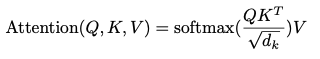

To make things even more clear, the authors gave us the following image, which shows us the individual operations that make up Scaled Dot-Product Attention:

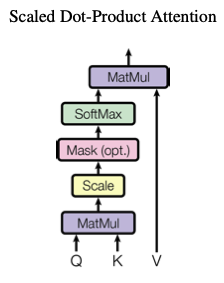

Let's briefly focus on each of these operations, and then implement this in code.

#### Step 1: Create the Query, Keys, and Values (Q, K, V)

The attention mechanism has 3 inputs: the **query**, the **keys**, and the **values** (denoted as **Q, K,** and **V**, respectively). At this point, the meaning behind these names is not important. What ***is*** important, however, is where these values are coming from:

**The query, keys, and values are each a seperate linear transformation of the same exact input.**

This is known as **self-attention**, and is the bedrock of the Transformer architecture.

So, in order to get (**Q, K, V**), we take our input (**X**) and apply three seperate linear transformations to it. In practice, these "linear transformations" consist of multiplying our input by some weight matrix, **W**. 

Now, in large language models, such as GPT, these inputs are usually the output of an embedding layer. If you're not familiar with what an embedding layer is, you can think of it as a lookup table, where each word (or sub-word) is mapped to a fixed-sized vector. Throughout the course of training, the values resulting from this mapping are optimized, ultimately creating a rich representation of the underlying text.

As such, take a look at the below (crude) code example, which processes and embeds a sentence by doing the following:
1. splitting it into words
2. assigning each word a unique integer value
3. mapping that integer value to a fixed-size vector. 

In [2]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [3]:
sentence = "The New York Rangers beat the Pittsburgh Penguins last night"

words = sentence.lower().split()

int2word = {k: v for (k, v) in enumerate(set(words))}
word2int = {v: k for (k, v) in int2word.items()}

vocab_size = len(word2int)

embedding_dim = 3
embedding_layer = np.random.randn(vocab_size, embedding_dim)

tokens = [word2int[w] for w in words]

embeddings = np.asarray([embedding_layer[idx] for idx in tokens])

print(sentence)
print(tokens)
print(embeddings)

The New York Rangers beat the Pittsburgh Penguins last night
[1, 0, 8, 4, 5, 1, 6, 7, 2, 3]
[[ 1.52302986 -0.23415337 -0.23413696]
 [ 0.49671415 -0.1382643   0.64768854]
 [-0.54438272  0.11092259 -1.15099358]
 [ 0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733]
 [ 1.52302986 -0.23415337 -0.23413696]
 [-0.90802408 -1.4123037   1.46564877]
 [-0.2257763   0.0675282  -1.42474819]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]]


Now that we have our word embeddings, we can calculate our query, keys, and values (Q, K, V). To do so, we'll create three distinct weight matrices. Each one of these weight matrices are multiplied to our embeddings, resulting in Q, K, and V.

In [6]:
# weights to calculate (Q, K, V)
w_q = np.random.random((embedding_dim, 3))
w_k = np.random.random((embedding_dim, 3))
w_v = np.random.random((embedding_dim, 3))

# calculate (Q, K, V), each as a seperate linear transform of the same input
Q = embeddings @ w_q
K = embeddings @ w_k
V = embeddings @ w_v

print("Embeddings")
print(embeddings)
print("Query")
print(Q)
print("Keys")
print(K)
print("Values")
print(V)

Embeddings
[[ 1.52302986 -0.23415337 -0.23413696]
 [ 0.49671415 -0.1382643   0.64768854]
 [-0.54438272  0.11092259 -1.15099358]
 [ 0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733]
 [ 1.52302986 -0.23415337 -0.23413696]
 [-0.90802408 -1.4123037   1.46564877]
 [-0.2257763   0.0675282  -1.42474819]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]]
Query
[[ 0.82251338  0.81159993  1.00373091]
 [ 0.789867    0.66368101  0.84142144]
 [-1.2204644  -0.97983602 -1.2912466 ]
 [-2.03923402 -1.0427095  -2.47982019]
 [-0.64944775 -0.30323953 -0.9789908 ]
 [ 0.82251338  0.81159993  1.00373091]
 [-0.21436719  0.0748143  -0.68296169]
 [-1.21676708 -0.93554805 -1.25058156]
 [ 1.15742847  0.83511444  1.58651721]
 [-0.17729782  0.02908763 -0.20822642]]
Keys
[[ 0.59710626  0.69727221  0.52472329]
 [ 0.65395643  0.44833603  0.53741555]
 [-0.99849853 -0.63442084 -0.81462134]
 [-1.02690968 -0.62218315 -0.8339267 ]
 [-0.10341011 -0.30441642 -0.11241646]
 

#### Step 2: Calculate Attention Scores

Once we have our query, keys, and values, we can calculate something called the "attention scores". This weighs every word in the input sequence against all other words in that same sequence. In short, this gives us the ability to determine how much "focus" to place on other parts of the input, give any single word.

This is done in three steps:

    1. Take the dot product of Q and K.
    2. Divide the result by the square root of the dimensionality of K (which has the same dimensionality as Q and V, since they're generated from the same input).
        - This is done to help keep gradients stable during training.
    3. Then, we pass the result through a softmax operation to produce a probability distribution.


In [7]:
def softmax(x: np.ndarray, axis: int) -> np.ndarray:
    x = np.exp(x - np.amax(x, axis=axis, keepdims=True))
    return x / np.sum(x, axis=axis, keepdims=True)

# calculate attention scores as dot product between Q and K
scores = Q @ K.T  # (n x n) matrix
print(scores.shape)

# divide by dimensionality of K, and pass through softmax operation
scores = softmax(scores / K.shape[1]**0.5, axis=1)
print("Attention Scores:")
print(scores)

(10, 10)
Attention Scores:
[[0.18243745 0.16802514 0.02108437 0.02068868 0.05655159 0.18243745
  0.1003192  0.02160608 0.17296424 0.0738858 ]
 [0.1734229  0.16278623 0.02623697 0.02577806 0.06298736 0.1734229
  0.10501411 0.02673269 0.16481552 0.07880325]
 [0.01481013 0.01622602 0.26281878 0.27014354 0.06875659 0.01481013
  0.03139258 0.25583144 0.01604364 0.04916716]
 [0.0030721  0.00327762 0.30496995 0.32180184 0.03189181 0.0030721
  0.0083367  0.29947226 0.00363189 0.02047372]
 [0.04102871 0.04165262 0.20088451 0.20482428 0.09114326 0.04102871
  0.05688238 0.20007179 0.04362594 0.07885779]
 [0.18243745 0.16802514 0.02108437 0.02068868 0.05655159 0.18243745
  0.1003192  0.02160608 0.17296424 0.0738858 ]
 [0.07340867 0.07175437 0.1431818  0.14486066 0.09856377 0.07340867
  0.07831247 0.14422004 0.07640466 0.0958849 ]
 [0.01571131 0.01711131 0.26024725 0.26744658 0.06993562 0.01571131
  0.0324035  0.25378401 0.01701834 0.05063077]
 [0.19979083 0.18620737 0.01061357 0.01029198 0.0430595

These scores can also be visualized with a heatmap.


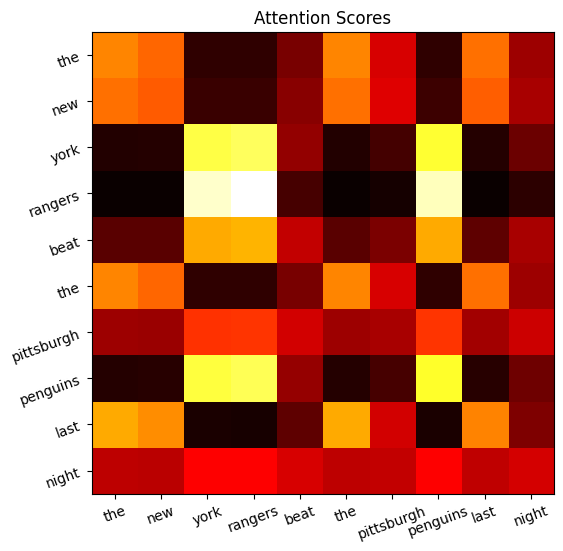

In [45]:
labels = [int2word.get(x) for x in tokens]
ticks = list(range(len(tokens)))

plt.figure(figsize=(15,6))
plt.imshow(scores, cmap="hot")
plt.xticks(ticks, labels, rotation=20)
plt.yticks(ticks, labels, rotation=20)
plt.title("Attention Scores")
plt.show()

#### Step 3: Apply Attention Scores to Values

Lastly, we multiply the values by the attention scores. The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers).



In [10]:
# multiple attention scores with our valuese (V)
# this tells us how much to "attend" to our values
attention_output = scores @ V
attention_output

array([[ 0.55223997,  0.14500153,  0.30003606],
       [ 0.48364594,  0.12473938,  0.26719983],
       [-0.861311  , -0.33858932, -1.10192064],
       [-0.98619227, -0.39179351, -1.33847273],
       [-0.6096025 , -0.24516223, -0.77282733],
       [ 0.55223997,  0.14500153,  0.30003606],
       [-0.32037601, -0.14277565, -0.44817878],
       [-0.85209962, -0.3350942 , -1.08908994],
       [ 0.66932345,  0.18158397,  0.378357  ],
       [-0.19828427, -0.09888715, -0.30353304]])

Let's pause for a second and think about what we're doing here.

We took a sentence, broke it apart, and calculated which parts to focus on more heavily. This is where the name *Attention* comes from--we are determining which words to *pay attention* to.

Take this sentence, for example:

    The dog didn't chase the ball because it was tired.

What does "it" refer to here? The dog or the ball? As humans, its pretty obvious that "it" is referring to the dog. But how do we teach that to an algorithm? It turns out that self-attention is a pretty remarkable way of doing just that.

As the model processes each word, self-attention allows it to look at other words in the input sequence for clues into what this word truly means.

Of course, self-attention isn't the only mechanism capable of doing this. Reccurent models (RNNs, LSTMs, GRUs, ...etc.), for example, can do this by maintaining a hidden state and iterating over each word. 

Self-attention, however, does this it in a (generally) more efficient way--so efficient, in fact, that one might go as far as to say that *Attention Is All You Need*. 


## Multi-Head Attention

Hopefully you're still with me up until this point, as there is one more "trick" we need to discuss. In the Transformer architecture, self-attention is actually used in a slightly different way.

Instead of calculating self-attention for the entire input sequence, the query, keys, and values are split up into a number of smaller parts. These parts are called "feature heads".

Each one of these feature heads consist of a smaller Q, K, and V, which all get treated as they would in regular self-attention. The only difference here is that the dimensionality is smaller (because we split up our input sequence into smaller pieces). 

After each split is passed through the attention mechanism, the results are concatenated back together. This entire process is called **Multi-Head Attention**, and is the standard way that Transformer-based architectures calculate attention.

Let's see what this looks like in code:

In [145]:
def attention(q: np.ndarray, k: np.ndarray, v: np.ndarray) -> np.ndarray:
    scores = np.dot(q, k.T)
    scores = softmax(scores / k.shape[1]**0.5, axis=1)
    return np.dot(scores, v)

num_heads = 2

# split each of Q, K, V into 'num_heads' chunks
Q_heads = np.array_split(Q, num_heads)
K_heads = np.array_split(K, num_heads)
V_heads = np.array_split(V, num_heads)

mha = []  # multi_headed_attention
for q, k, v in zip(Q_heads, K_heads, V_heads):
    mha.append(attention(q, k, v))

mha = np.concatenate(mha)

print(f"Multi-Head Attention With {num_heads} Heads:")
print(mha)

Multi-Head Attention With 2 Heads:
[[ 0.60953835  0.01358341  0.13193092]
 [ 0.73296062  0.26665053  0.2208828 ]
 [ 0.75949672  0.31877813  0.239563  ]
 [ 0.5748434  -0.04915518  0.10892594]
 [ 0.70931645  0.21137786  0.20226688]
 [-0.7476555  -0.14789445 -0.186506  ]
 [-2.0856066  -0.29344913 -0.45671552]
 [-2.57472182 -0.40726148 -0.57480416]
 [-1.48388317 -0.24861617 -0.337241  ]
 [-2.34642163 -0.42059472 -0.53500223]]


So, why do we do this? Well, in the words of the authors of _Attention Is All You Need_: "Due to the reduced dimension of each head, the total computational cost [of multi-head attention] is similar to that of single-head attention with full dimensionality."

What this means is that by splitting up our input sequence, we can calculate a richer representation of the same input for essentially the same cost.

## Transformers

So, how exactly is self-attention used in Transformers? What does this looks like?

The transformer architecture is typically composed of an encoder + decoder structure, followed by a task-specific classification or regression head. These encoders and decoders can be arranged in various ways, but here we'll use the architecture from *Attention Is All You Need*, which looks like the below:

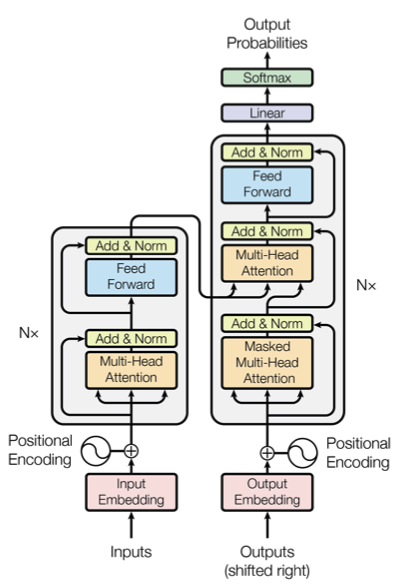

Let's break this down piece-by-piece.

On the left, we have our **Encoder**. And on the right, we have our **Decoder**. If you're not familiar with this type of architecture, I would recommend this quick blog post https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

Both the Encoder and Decoder are comrpised of only a few basic building blocks: Multi-Head Attention, "Add & Norm", and a feed-forward neural network. Since we already discussed Multi-Head Attention, we can briefly focus on the other two.

First, let's tackle "**Add & Norm**". As its name suggests, this consists of two different operations: addition and layer normalization. Layer normalization is similar to batch normalization, except it occurs over the feature dimension. 

To understand the purpose of the addition operation, take another look at the diagram. Did you notice how there is an arrow connecting each sub-layer's input to its output? This is called a residual connection, and is a pretty popular trick in the AI world. To be clear, a residual connection is when a layer's input is added back to its output. By doing this, we are providing the model another way to route information.

So, using what we know so far, we can begin to piece together what is happening here: 
1. First, our input undergoes three seperate linear transformations to create our query, keys, and values (Q, K, V).
2. Then, the query, keys, and values are split up into smaller pieces. Each one of these pieces is used to calculate self-attention seperately, and the results are concatenated back together. 
3. Lastly, we add back the original input and normalize

For clarity's sake, let's write some code demonstrating everything we've talked about up until this point:

In [146]:
sentence = "The New York Rangers beat the Pittsburgh Penguins last night"

words = sentence.lower().split()

int2word = {k: v for (k, v) in enumerate(set(words))}
word2int = {v: k for (k, v) in int2word.items()}

vocab_size = len(word2int)

embedding_dim = 3
embedding_layer = np.random.randn(vocab_size, embedding_dim)

tokens = [word2int[w] for w in words]

embeddings = np.asarray([embedding_layer[idx] for idx in tokens])

In [148]:
def attention(q: np.ndarray, k: np.ndarray, v: np.ndarray) -> np.ndarray:
    scores = np.dot(q, k.T)
    scores = softmax(scores / k.shape[1]**0.5, axis=1)
    return np.dot(scores, v)

def multi_headed_attention(q: np.ndarray,
                           k: np.ndarray,
                           v: np.ndarray,
                           num_heads: int) -> np.ndarray:
    q_heads = np.array_split(Q, num_heads)
    k_heads = np.array_split(K, num_heads)
    v_heads = np.array_split(V, num_heads)
    mha = []  # multi_headed_attention
    for query, keys, values in zip(q_heads, k_heads, v_heads):
        mha.append(attention(query, keys, values))
    mha = np.concatenate(mha)
    return mha

# weights to calculate (Q, K, V)
w_q = np.random.random((embedding_dim, 3))
w_k = np.random.random((embedding_dim, 3))
w_v = np.random.random((embedding_dim, 3))

# calculate (Q, K, V), each as a seperate linear transform of the same input
Q = embeddings @ w_q
K = embeddings @ w_k
V = embeddings @ w_v

mha_output = multi_headed_attention(Q, K, V, num_heads=3)

# add back the original input embeddings
mha_output = mha_output + embeddings

print(f"MHA Input (shape={embeddings.shape}):")
print(embeddings)
print(f"MHA Output (shape={mha_output.shape}):")
print(mha_output)

MHA Input (shape=(10, 3)):
[[-2.89625538  2.0883747  -0.13958963]
 [ 0.91632767  0.34648848  0.99801011]
 [ 0.63873022 -1.14300491  1.63343153]
 [-0.1906824   0.21743287  0.87006773]
 [ 0.49568189  0.15041891  0.364961  ]
 [-2.89625538  2.0883747  -0.13958963]
 [ 2.40341559 -0.0576188   0.20109905]
 [ 1.0506544   1.10552593  1.18703031]
 [ 1.10818282 -1.03990593  0.61277391]
 [-1.05341556 -0.62376896  1.91403135]]
MHA Output (shape=(10, 3)):
[[-2.78893211  2.04578129 -0.23032928]
 [ 1.18303646  0.87416007  1.38036089]
 [ 0.86905636 -0.65230919  1.96749529]
 [-0.01424929  0.62255251  1.11317113]
 [ 1.37666534  1.148573    1.57974241]
 [-2.60455381  2.1013331  -0.0412284 ]
 [ 3.46920801  1.19249537  1.72110217]
 [ 2.28276012  2.53630545  2.75553923]
 [ 1.63643914 -0.272355    1.31308437]
 [-0.42670497  0.23689275  2.74198423]]


This can be visualized with the plot below:


Text(0.5, 1.0, 'Multi-Head Attention Output')

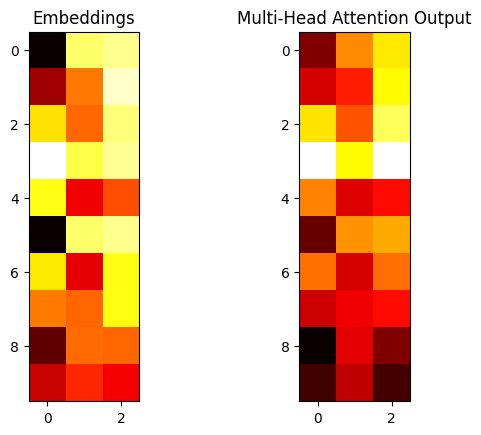

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(embeddings, cmap="hot")
ax1.set_title("Embeddings")

ax2.imshow(mha_output, cmap="hot")
ax2.set_title("Multi-Head Attention Output")


To continue, the Feed-Forward Neural Network is comprised of two linear transformations with a non-linear transformation in between. The non-linear activation function used is the Rectified Linear Unit (ReLU). 

In _Attention Is All You Need_, the initial layer expands the data by a degree of four, while the output layer compresses the data back to its original dimension. While this is not a set-in-stone rule, this is also what we'll be doing for our purposes.

The below code takes the output of our Multi-Head Attention operation, and passes it through the feed-forward net. Then, it adds back the feed-forward net's input (which is attention's output).

Note that we are leaving out the layer normalization to keep things simple. Also, note that we are leaving out our bias terms.

In [113]:
def relu(a):
    return np.maximum(0, a)

ffn_input_shape = mha_output.shape[-1]
ffn_weights_1 = np.random.randn(ffn_input_shape, ffn_input_shape*4)
ffn_weights_2 = np.random.randn(ffn_input_shape*4, ffn_input_shape)

ffn_out = relu(np.dot(mha_output, ffn_weights_1))
ffn_out = np.dot(ffn_out, ffn_weights_2)

ffn_out = ffn_out + mha_output

print(f"FFN Input Shape: {mha_output.shape}")
print(f"FFN Output Shape: {ffn_out.shape}")

FFN Input Shape: (10, 3)
FFN Output Shape: (10, 3)


And that's it! Aside from some minor things, we just coded the forward-pass of the Transformer Encoder.

Well, except for one thing...

### Positional Encodings

You may have noticed that in the Transformer architecture diagram, the input embeddings undergo something called *positional encoding*. This is something we need to touch upon, as it is an important topic.

Transformers dont have any temporal/spatial awareness. Other architectures, like RNNs, do have temporal awareness by default, as they process data in a sequence.

So, in order to give our model a notion of time and space, we have to inject extra information into its input. This information should represent a particular input's position relative to its respective sequence.

Positional Encodings aren't anything new, and there are several different ways to calculate them. For instance, we could encode our first timestep as the integer 1, and increase this integer by a fixed increment after every timestep. 

The authors, however, chose a more complicated approach involving trigonometric functions. Essentially, this approach generates sinusoidal waves at different frequencies that allow the model to attend to the relative positions of its inputs.

An implementation can be seen below:

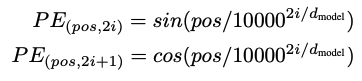

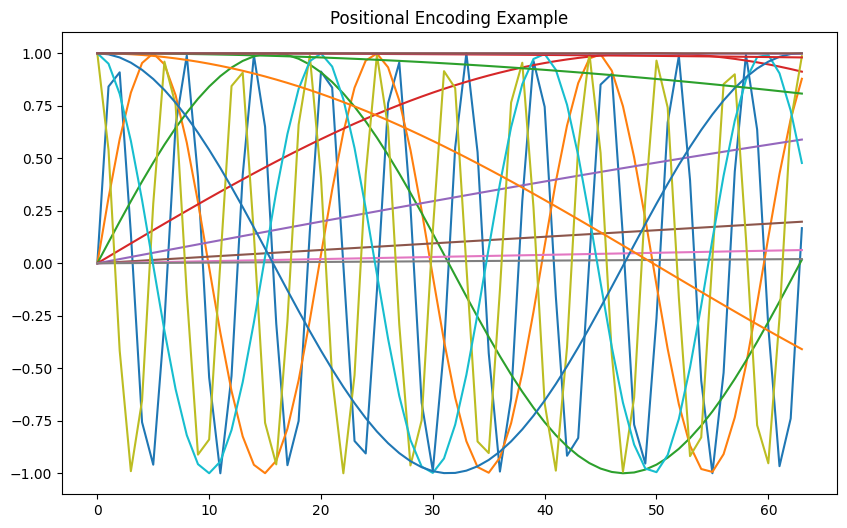

In [130]:
def positional_encoding(length: int, depth: int):
    """
    Positional Encoding as described in 'Attention Is All You Need'
    
    NOTE: 10000 is a user defined scalar.
    """
    assert depth % 2 == 0, "'depth' must be even"
    depth = depth / 2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :] / depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)  10,000 chosen because its sufficiently large
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1) 
    return pos_encoding

plt.figure(figsize=(10,6))
plt.plot(positional_encoding(64, 16))
plt.title("Positional Encoding Example")
plt.show()

Before we use our input embeddings to generate the query, keys, and values, we need add in this positional encodings. To reiterate: by adding a positional encoding to our embeddings, we are effectively injecting information about the position of a particular word in its overall sequence. The following code demonstrates this.

In [149]:
sentence = "The New York Rangers beat the Pittsburgh Penguins last night"

words = sentence.lower().split()

int2word = {k: v for (k, v) in enumerate(set(words))}
word2int = {v: k for (k, v) in int2word.items()}

vocab_size = len(word2int)

embedding_dim = 4
embedding_layer = np.random.randn(vocab_size, embedding_dim)

tokens = [word2int[w] for w in words]

embeddings = np.asarray([embedding_layer[idx] for idx in tokens])

embeddings = embeddings + positional_encoding(*embeddings.shape)
embeddings.shape

(10, 4)

### Teacher Forcing

So, what exactly are the inputs to the Encoder and Decoder? To understand this, you need to understand a concept called **teacher forcing**.

The Transformer, much like the attention mechanism, was originally designed for sequence-to-sequence modeling. Specifically, it was developed with machine translation in mind, which is the task of taking a sentence in one language and automatically translating it to another. It is common to use the Encoder-Decoder structure for this type of task, which is why the authors chose to do so as well.

Take the below, for example, which shows how an LSTM Encoder-Decoder model is trained to translate text.


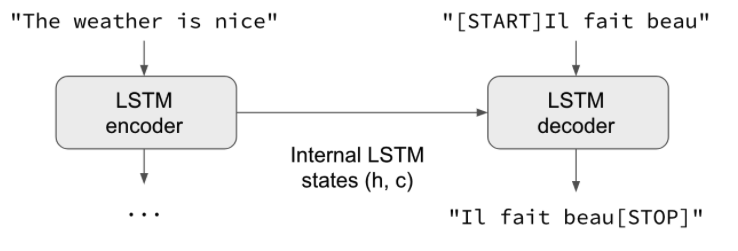
 


Here, the encoder takes in an english sentence, processes it, and returns its internal state. Simple enough, right? 

The decoder, on the other hand, is slightly more complex.

To properly understand it, you need to understand that these types of models are autoregressive. This means that the model's own predictions are fed back into it as the next inputs. Said differently, the model uses its predictions as inputs to make further predictions. 

So, how do we train an autoregressive model?

The best way to do this is to predict the next tokens in a sequence, given the current and previous tokens in that same sequence. And this is exactly what the decoder does: given targets[...t], the decoder learns to predict targets[t+1...].

Using the targets at timestep (t) to predict the targets at timestep (t+1) is what's known as *teacher forcing*.

During inference, however, the model's predictions are indeed fed back into the model as inputs. This looks like the below:

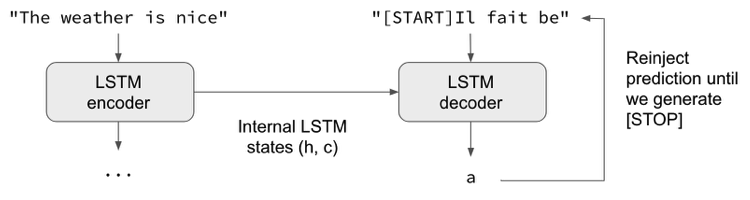

In the Transformer, this whole flow can be summarized like this (excluding residual connections and layer normalization):

- Encoder
    - input is transformed into query, keys, and values (Q, K, V)
    - Q, K, V is used to calculate self-attention
    - The output is passed through a feed forward net and returned

- Decoder
    - the previous predictions are used as input, being transformed into the query, keys, and values (Q, K, V)
    - Q, K, V is used to calculate self-attention 
    - The output is used as a new query, while the encoder's output is used as the keys and values. Attention is once again computed using this new set of query, keys, and values
    - The output is passed through a feed forward net and returned

## Building a Transformer (Tensorflow)

We now have all the building blocks we need to build a Transformer model. For the remainder of this post, we'll be using Tensorflow, a popular deep learning library.

We will start off by extending tensorflow's embedding layer to include a positional encoding (through the addition operation).

In [123]:
import tensorflow as tf


class PositionalEmbedding(tf.keras.layers.Embedding):
    def __init__(self, vocab_size: int, d_model: int, **kwargs):
        super().__init__(input_dim=vocab_size, output_dim=d_model, mask_zero=True, **kwargs)
        self.vocab_size = self.input_dim
        self.d_model = self.output_dim
        self.pos_encoding = tf.cast(positional_encoding(length=vocab_size, depth=d_model), dtype=tf.float32)

    def call(self, inputs: tf.Tensor) -> tf.Tensor:
        length = tf.shape(inputs)[1]
        inputs = super().call(inputs)
        inputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))  # sets the relative scale of the embedding and positonal_encoding.
        inputs = inputs + self.pos_encoding[tf.newaxis, :length, :]
        return inputs


2023-03-29 16:32:35.450757: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Then, we can extend tensorflow's Multi-Head Atttention to include the layer normalization and residual connection. After, we create three different objects representing the three attention mechanisms in our model.

The *SelfAttention* class processes the input to the encoder, while *MaskedSelfAttention* processes the input to the decoder. Both are identical, with one exception: in MaskedSelfAttention, a mask is used to tell the model to ignore targets[t+1...], as those are the values we are trying to predict.

The *CrossAttention* class represents the attention mechanism that connects the encoder and decoder. The caveat with cross attention is that the encoder's output is used for the keys and values, while the output of the decoder's masked self-attention is used for the query.



In [137]:
class AttentionBase(tf.keras.layers.MultiHeadAttention):
    """
    args:
        num_heads: Number of attention heads.
        key_dim: Size of each attention head for query and key.
                 Dimensionality of the linearly projected queries and keys
        value_dim: Size of each attention head for value.
                   Dimensionality of the linearly projected values
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()


class SelfAttention(AttentionBase):
    """
    Processes the 'context' sequence (input to the encoder)
    """
    def call(self, x, use_causal_mask: bool = False):
        attention = super().call(query=x,
                                 value=x,
                                 key=x,
                                 use_causal_mask=use_causal_mask)
        return self.layer_norm(self.add([x, attention]))


class MaskedSelfAttention(SelfAttention):
    """
    Processes the output sequence into the decoder layer
    Same as SelfAttention, except with a mask
    """
    def call(self, x):
        return super().call(x, use_causal_mask=True)


class CrossAttention(AttentionBase):
    """
    Connects the Encoder and Decoder in the following way:
        - keys, values from encoder are used
        - quereies: shifted inputs (1 to the right) are used
    Output length is the length of the query sequence, not the key-value sequence
    """
    def call(self, prev_target, encoder_output):
        attention_output, attention_scores = super().call(query=prev_target,
                                                          key=encoder_output,
                                                          value=encoder_output,
                                                          return_attention_scores=True)
        self.last_attention_scores = attention_scores  # cache for plotting
        return self.layer_norm(self.add([prev_target, attention_output]))



Next up is the Feed Forward Neural Network. In Tensorflow, this is composed of two dense layers, the first of which uses ReLU activation.

Note that we are also adding in some dropout. In thas Transformer, this is applied to the output of each sub-layer, prior to it being added back to the input. This is called residual dropout.

In [138]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model: int, dff: int, dropout: float = 0.1):
        super().__init__()
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation="relu"),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()
    
    def call(self, x):
        return self.layer_norm(self.add([x, self.ffn(x)]))


With our attention mechanisms and feed forward net defined, we can now begin coding the Encoder and Decoder. The transformer stacks both the encoder and decoder 6 times. In this spirit, we define a helper function "get_clones" to duplicate its input *n* times. 

In [139]:
from typing import Any
from copy import deepcopy

def get_clones(obj: Any, n: int) -> List[Any]:
    """clones 'obj' 'n' times """
    assert n > 0, "'n' must be > 0"
    clones = []
    for _ in range(n):
        clones.append(deepcopy(obj))
    return clones


If you recall from earlier, the Encoder is comprised of self-attention, followed by a feed forward net. We duplicate this structure *num_layers* times. Lastly, remember that the inputs undergo a positional encoding before being broken up into the query, keys, and values. 

It might be useful to compare the code to the Encoder diagram below:

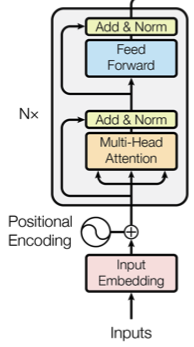

In [140]:
class Encoder(tf.keras.layers.Layer):
    """Consists of a Positional Embedding and a stack of (self attention + ffn) models"""
    def __init__(self,
                 num_layers: int,
                 vocab_size: int,
                 d_model: int,
                 dff: int,
                 num_heads: int,
                 dropout: float = 0.1):
        if num_layers < 1:
            return ValueError("'num_layers' must be >= 1")
        super().__init__(name="TransformerEncoder")
        self.pos_embed = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)
        self.sub_layers = []
        for _ in range(num_layers):
            self.sub_layers.append(
                tf.keras.Sequential([
                    SelfAttention(num_heads=num_heads, key_dim=d_model, value_dim=d_model, dropout=dropout),
                    FeedForward(d_model=d_model, dff=dff, dropout=dropout)
                ])
            )
        self.num_layers = num_layers
    
    def call(self, x):
        x = self.pos_embed(x)
        for layer in self.sub_layers:
            x = layer(x)
        return x


As you can see, the Encoder is pretty straightforward. The Decoder, on the other hand, is slightly more complicated.

After the inputs are processed by masked self-attention, the output flows to a second attention mechanism called cross-attention. This layer uses the output from masked self-attention as the query, and the output from the encoder model as the keys and values. Lastly, the output of cross-attention is passed to the feed forward net.

As with the encoder, placing the diagram above the code proves helpful:

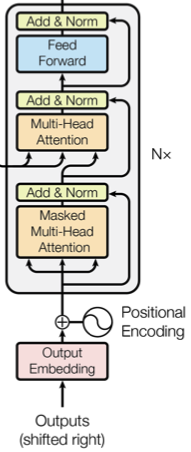

In [143]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, num_layers: int, d_model: int, dff: int, num_heads: int, dropout: float = 0.1):
        super().__init__()
        self.masked_attn = MaskedSelfAttention(num_heads=num_heads, key_dim=d_model, value_dim=d_model, dropout=dropout)
        self.cross_attn = CrossAttention(num_heads=num_heads, key_dim=d_model, value_dim=d_model, dropout=dropout)
        self.ffn = FeedForward(d_model=d_model, dff=dff, dropout=dropout)
    
    def call(self, prev_target, encoder_output):
        prev_target = self.masked_attn(prev_target)
        out = self.cross_attn(prev_target, encoder_output)

        self.scores = self.cross_attn.last_attention_scores

        return self.ffn(out)
        
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers: int, vocab_size: int, d_model: int, dff: int, num_heads: int, dropout: float = 0.1):
        super().__init__(name="TransformerDecoder")
        self.pos_embed = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)
        self.sub_layers = []
        for _ in range(num_layers):
            self.sub_layers.append(
                DecoderLayer(num_layers=num_layers, num_heads=num_heads, d_model=d_model, dff=dff, dropout=dropout)
            )
        self.num_layers = num_layers
    
    def call(self, prev_target, encoder_output):
        x = self.pos_embed(prev_target)
        for layer in self.sub_layers:
            x = layer(prev_target=x, encoder_output=encoder_output)
        self.scores = self.sub_layers[-1].scores
        return x



The decoder outputs a vector of floats. But how do we turn that into a word? That is the job of a final output layer, which takes our decoder values and turns them into a probability distribution. We implement this by using a dense (linear) layer with softmax activation.

But how exactly does that work?

The dense layer linearly projects the decoder outputs into a much larger vector, called a logits vector. Now, if our model knows 5,000 unique words (our model’s “output vocabulary"), the logits vector will be 5,000 values long. Each value in this vector corresponds to a unique word. The softmax layer then turns those values into probabilities that, when summed, add up to 1. The word with the highest probability is the winner, and it outputted by the model.

As a reminder, Transformers are autoregressive. So, this output can be fed back into the model to help predict the next token in the sequence.

In [142]:
class Transformer(tf.keras.Model):
    """
    Seq-to-Seq Encoder/Decoder Transformer model described in
    'Attention Is All You Need'
    The model used in the paper:
        num_layers = 6
           d_model = 512
               dff = 2048
         num_heads = 8
    """
    def __init__(self,
                 src_size: int,
                 tgt_size: int,
                 num_layers: int,
                 d_model: int,
                 dff: int,
                 num_heads: int,
                 dropout: float = 0.1):
        super().__init__(name="Transformer")
        self.encoder = Encoder(num_layers=num_layers,
                               vocab_size=src_size,
                               d_model=d_model,
                               dff=dff,
                               num_heads=num_heads,
                               dropout=dropout)

        self.decoder = Decoder(num_layers=num_layers,
                               vocab_size=src_size,
                               d_model=d_model,
                               dff=dff,
                               num_heads=num_heads,
                               dropout=dropout)

        self.output_layer = tf.keras.layers.Dense(tgt_size, activation="softmax")
    
    def call(self, x, prev_target):
        x = self.decoder(prev_target=prev_target, encoder_output=self.encoder(x))
        logits = self.output_layer(x)
        try:  # drop keras mask so it doesn't scale the losses/metrics
            del logits._keras_mask
        except AttributeError:
            pass
        return logits


And that's it!

In the paper they used 6 encoder layers, 6 decoder layers, an embedding dimensionality of 512, and 8 feature heads (meaning the query, keys, and values get split into 8 smaller pieces).

We can use these specs to build our Transformer and print the summary:

In [144]:
transformer = Transformer(num_layers=6,
                          num_heads=8,
                          d_model=512,
                          dff=512*4,
                          src_size=2048,
                          tgt_size=2048,
                          dropout=0.1)

# pass fake input through the model to build its graph
fake_input = np.arange(2048).reshape(1,-1)
transformer(fake_input, fake_input)

# now we can check out the summary
transformer.summary()

Model: "Transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 TransformerEncoder (Encoder  multiple                 64067584  
 )                                                               
                                                                 
 TransformerDecoder (Decoder  multiple                 114482176 
 )                                                               
                                                                 
 dense_24 (Dense)            multiple                  1050624   
                                                                 
Total params: 179,600,384
Trainable params: 179,600,384
Non-trainable params: 0
_________________________________________________________________


That's a lot of params! Note that these large language models, like GPT, are using dozens of these Transformer blocks stacked on top of each other.


## GPT and The Future of AI

Back in the good 'ol days, OpenAI released their models to the public. Of course, this was short-lived and ultimately stopped with GPT-3. Likewise, we don't know for sure what advances have been made in regards to the GPT architecture. Despite this, we can look at the older, open-source versions of GPT for some clarity, as it is unlikely the general architecture has strayed *that* much.

So, in that case, let's talk about the original GPT (the OG-GPT, if you will).

In the original GPT paper (https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf), called *Improving Language Understanding by Generative Pre-Training*, the authors describe their model like this:

    "Our model largely follows the original transformer work. We trained a 12-layer decoder-only transformer with masked self-attention heads"
   
The part that should stand out here is "***12-layer decoder-only***". Instead of using 6 encoder layers and 6 decoder layers, like the original model in _Attention Is All You Need_, OpenAI chose to cut out the encoder altogether, and instead favor using 12 decoders.

In their paper, they give us the below image, representing this 12-layer decoder-only structure:

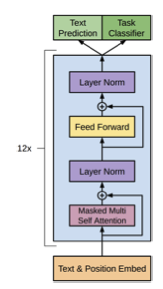

The model is comprised entirely of masked self-attention and a feed forward net (as well as residual connections and some layer normalization). All in all, this is the same architecture as our decoder model, excluding the extra cross-attention layer that would normally process the encoder's output.

Soon after GPT-1, OpenAI released a paper about GPT-2 (https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf), titled *Language Models are Unsupervised Multitask Learners*. And in this paper, they say that GPT-2 is essentially the same as GPT-1, barring a few tweaks.

The key differences are the following:

- the Layer Normalization was moved to the input of each sub-layer
- the dimensionality was increased from 512 to 1024
- the vocabulary size was increased from 40,000 to over 50,000


Then, in 2020, a group of OpenAI engineers released the preprint for their GPT-3 paper, titled *Language Models are Few-Shot Learners* (https://arxiv.org/pdf/2005.14165.pdf). In this paper, the authors say that GPT-3 is structurely identical to GPT-2, except for the introduction of some tricks to reduce the space/time complexity of the model. In other words, they made it faster. If you're interested, those tricks can be read about here (https://arxiv.org/pdf/1904.10509.pdf).

So, if the architecture for GPT, GPT-2, and GPT-3 are all virtually identical, then where are the advances coming from? Why is each GPT model so much better than its predecessors? The answer to this question can be found in the table below, taken from wikipedia (https://en.wikipedia.org/wiki/Generative_pre-trained_transformer)

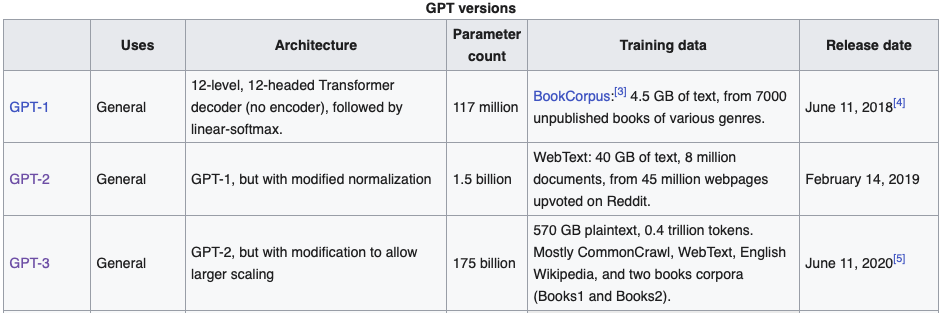

If you didn't already know, the parameter count is a proxy for the size of the model. This means that GPT-2 is over 10 times larger than GPT-1. And further, GPT-3 is a staggering 116 times larger than GPT-2!

If these numbers are hard to comprehend, maybe this will help put things in perspective: It is estimated that it would take 355 years to train GPT-3 on a single GPU (https://lambdalabs.com/blog/demystifying-gpt-3). So, if you started today, hopefully your great-great-great-great-great grandkid would be able to see it complete (assuming GPT-20 hasn't rendered humanity extinct by then...kidding).

For each successive model, the increase in parameters is a direct result of the increase in dataset size, which can be seen in the table above. Generally speaking, the larger the dataset, the larger the model. And it is in this relationship where we can begin to grasp why these GPT models are so powerful.

In short: As GPT's dataset grows, it is becoming closer and closer to an ultra-compressed version of the Internet.

Think about it: when you want to know more about a topic, where do you go? Wikipedia? GPT is trained on Wikipedia. What about Google? Well, Google's dataset is a privatized version of CommonCrawl--which GPT is also trained on.

Do you see the theme here? GPT is not just a language model. Rather, it is something more. In fact, it isn't a stretch to say that GPT (and others like it) are human-knowledge models. 

To elaborate, let's think about what GPT is actually doing.

GPT is trained to predict the next token in a sequence. On a simplistic level, you can think of these tokens as the characters or words in a body of text. By doing this over hundreds of millions of web pages (probably even *billions* at this point), it is not only modeling language; but rather, it is also modeling *ideas*.

After all, that is how we as humans express our ideas: through language. So, by training GPT on the very medium in which we express thought, it makes sense how it is ultimately able to capture our collective ideas. And by doing so, it has become capable of some truly mind-numbing things.

Of course, this conversation always has the tendency to gradually boil down to the question: *What is intelligence?* So, since we were bound to get there eventually, let's just get on with it.

Is ChatGPT or GPT-4 the first form of Artificial General Intelligence (AGI)? How would we even know that? How do we even measure intelligence? Better yet, *what is* intelligence? (*queue the existential angst*)

I obviously don't know the answer to that question, nor does anyone. However, it is often useful to approach it like so: If you were to train a true Artificial General Intelligence, how would you go about it? How would you teach it? And what would be the benchmark for success?

It is in this vein that I would argue that a true AGI would need to display several different things.

First, it would need to have a capability to communicate with humans in a familiar way -- that is, through language. Score one for GPT. Most people would agree with this. However, the next criterion--which is entirely dependent on the first--is where the majority of the debate is actually held.

The Turing Test is the classical defintion of what would define a true Aritificial Intelligence. This proposition, posed by the legendary Alan Turing in 1950, evaluates an AI based on its ability to display intelligent behavior that is indistinguishable from a human being. Only then, many people say, can we say that a system is truly intelligent.

If you're anything like me, there is probably a voice in the back of your head, saying "Should we really evaluate intelligence in this manner? Is human intelligence the only definition of intelligence we should consider?"

Unforuntuately, the answer *has to be **yes***.

What other forms of intelligence do we know? Sure, some might say: "oh, dolphins show high degrees of intelligence", or "cephalopods have been shown to have extremely high problem-solving abilities", or even "certain birds have been shown to plan ahead". But, while these traits are certainly signs of *intelligent behavior*, our collective bar for what actually defines *intelligence* seems to be quite higher.

And so, we have no choice but to define a true Artificial Intelligence as something equal to, or better than, ourselves.

Now, does GPT fall into this category? By itself, it certainly does not, as it is incapable of intelligently communicating with a human. ChatGPT, on the other hand, is a different story.

The best way to think about ChatGPT is to consider that GPT is really the "brain" behind the whole operation. That is, ChatGPT is really the result of teaching GPT how to communicate. Imagine if you were born with all of the knowledge you will ever have. Now, imagine if you didn't have the ability to speak or write. How would you get your thoughts across?

This is why ChatGPT in particular has changed the game. By teaching GPT how to communicate, the engineers at OpenAI have opened up the "brain" that is GPT, to mere mortals like you and me. From fixing a developer's code to helping a student with their homework, ChatGPT has unequivecolly passed our first test. Now, the only question is: Can it pass the Turing Test?

----


At the time of writing, we don't know how many parameters are used in GPT-4, nor do we know the size of the dataset involved. However, it is safe to say that it will be larger than GPT-3 (most likely **a lot** larger). There are many reports from "anonymous sources" placing it at over 1 trillion parameters, but this has yet to be confirmed. That being said, given the exponential increase in parameters between GPT models thus far, this is indeed the probable case. 


### References

- https://arxiv.org/pdf/1706.03762.pdf
- https://peterbloem.nl/blog/transformers
- https://storrs.io/attention/
- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html